<a href="https://colab.research.google.com/github/santhanreddy864/In-class-exercise-1/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [4]:
import pandas as pd
x = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
x = x.head(4000)
x

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
3995,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,5,Perfect.,0.0
3996,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,3,It does not connect to network and internet we...,0.0
3997,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,5,Good,0.0
3998,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,4,Phone is in good working condition,0.0


In [5]:
x.shape
x_remove_null_val = x.dropna()
x_remove_null_val.shape

(3032, 6)

**visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


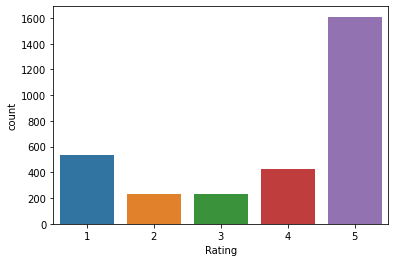

In [6]:
import seaborn as sns
sns.countplot(x_remove_null_val.Rating)

**Ratings**

In [7]:
def review_classification(rating):
    if rating < 3:
        return 'negative'
    return 'positive'
rating_classification = x_remove_null_val['Rating'].map(review_classification) 
x_remove_null_val['Rating'] = rating_classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
x_remove_null_val['Rating'].value_counts()

positive    2265
negative     767
Name: Rating, dtype: int64

**Ratings visalization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


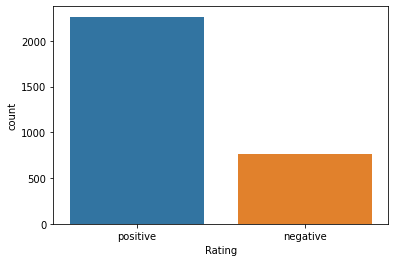

In [9]:
import seaborn as sns
sns.countplot(x_remove_null_val.Rating)


**Cleaning Data and Removing stopwords**

In [10]:
import re
i=0;
for sentence in x_remove_null_val['Reviews'].values:
    if (len(re.findall('<.*?>', sentence))):
        print(i)
        print(sentence)
        break;
    i += 1;
def cleanhtml(sent):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sent)
    return cleantext
import re
x_remove_null_val['Cleaned data'] = x_remove_null_val['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
x_remove_null_val['Cleaned data'] = x_remove_null_val['Cleaned data'].apply(lambda x: cleanhtml(x))
x_remove_null_val['Cleaned data'] = x_remove_null_val['Cleaned data'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
x_remove_null_val['Cleaned data'] = x_remove_null_val['Cleaned data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**K-Means**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer()
bow = c_vec.fit_transform(x_remove_null_val['Cleaned data'].values)
col_name = c_vec.get_feature_names()
from sklearn.cluster import KMeans
mod = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
mod.fit(bow)
labels = mod.labels_
cc = mod.cluster_centers_
cc


array([[0.01388889, 0.        , 0.00694444, ..., 0.        , 0.        ,
        0.00694444],
       [0.00177305, 0.        , 0.00088652, ..., 0.00132979, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03947368, 0.        , 0.        , ..., 0.01315789, 0.01315789,
        0.01973684],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

df = x_remove_null_val
df['Bow Clus Label'] = mod.labels_
df.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Bow Clus Label
0     144
1    2256
2       1
3      14
4       9
5       5
6     448
7     152
8       1
9       2
Name: Reviews, dtype: int64

In [13]:
print("Top terms per cluster:")
oc = mod.cluster_centers_.argsort()[:, ::-1]
terms = c_vec.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in oc[i, :10]:
        print(' %s' % terms[ind], end='')
        print()
        

Top terms per cluster:
Cluster 0: phone
 use
 one
 good
 screen
 like
 great
 sim
 card
 really
Cluster 1: phone
 great
 good
 screen
 price
 works
 work
 love
 like
 one
Cluster 2: phone
 tracfone
 data
 time
 use
 wifi
 android
 hard
 minutes
 alcatel
Cluster 3: phone
 screen
 good
 battery
 camera
 use
 phones
 great
 day
 one
Cluster 4: phone
 like
 screen
 one
 get
 camera
 really
 good
 back
 would
Cluster 5: phone
 screen
 battery
 would
 time
 like
 good
 use
 one
 card
Cluster 6: phone
 screen
 great
 one
 good
 would
 use
 price
 like
 get
Cluster 7: phone
 screen
 good
 great
 camera
 like
 battery
 speakers
 one
 really
Cluster 8: phone
 idol
 camera
 like
 one
 sound
 think
 screen
 feature
 device
Cluster 9: phone
 camera
 good
 quality
 one
 display
 moto
 experience
 like
 light


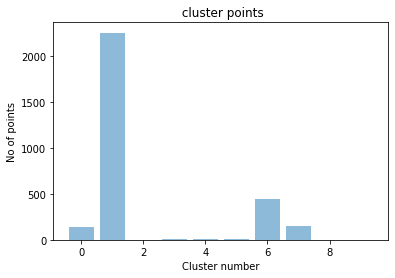

In [14]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.5)
plt.title(' cluster points')
plt.xlabel("Cluster number")
plt.ylabel("No of points")
plt.show()

**Average words to vector**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


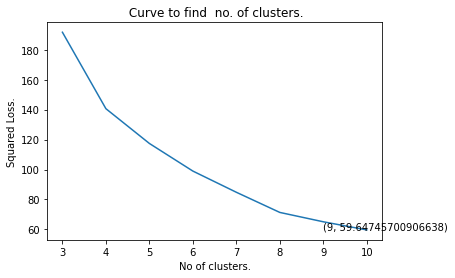

In [18]:
list_of_sentences = []
for sentence in x_remove_null_val['Cleaned data'].values:
    list_of_sentences.append(sentence.split())
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,size=100, workers=4)
import numpy as np
sent_vectors = []
for sent in list_of_sentences:
  sent_vec = np.zeros(100)
  cnt_words = 0
  for word in sent:
    try:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
    except:
      pass
  sent_vec /= cnt_words
  sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape
number_clus = [x for x in range(3,11)]
number_clus
se= []
for cluster in number_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)
    se.append(kmeans.inertia_)
    
oc = np.argmin(se) + 2
plt.plot(number_clus, se)
plt.title(" Curve to find  no. of clusters.")
plt.xlabel("No of clusters.")
plt.ylabel("Squared Loss.")
xy = (oc, min(se))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [19]:
print ("optimal no of clusters obtained = - ", oc)
print ("loss for cluster = - ", min(se))
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = oc)
model2.fit(sent_vectors)
wcp = model2.predict(sent_vectors)
wcp_2 = model2.labels_
wcc = model2.cluster_centers_
wcc[1:2]

optimal no of clusters obtained = -  9
loss for cluster = -  59.64745700906638


array([[ 9.21068253e-04, -8.04282972e-04, -8.40071393e-03,
        -9.05241396e-03,  1.43330738e-02,  8.01906638e-03,
         5.19640017e-03, -4.01796957e-03,  2.28845277e-02,
         1.87286866e-03,  2.48294062e-03,  1.86986981e-03,
         1.14003548e-02, -2.13436116e-02, -5.73059950e-04,
        -5.07174891e-04,  1.26262213e-02,  3.91554584e-03,
        -8.92711975e-03, -5.62628271e-03, -4.11500624e-03,
         1.26727360e-02, -1.40124764e-02, -1.46798648e-03,
        -2.87805240e-03, -1.55635123e-02,  6.16377485e-03,
        -3.13117584e-03, -1.32721744e-02,  4.70189381e-03,
        -6.64646004e-03, -1.33785116e-02,  9.48568805e-04,
        -5.47379660e-03, -1.74482314e-02,  4.02650477e-03,
         1.36725641e-02,  8.24408089e-03,  7.30453270e-03,
        -1.58483233e-02, -3.32762478e-03, -2.63997170e-03,
         1.14896042e-02, -8.44026579e-03,  3.21582710e-03,
        -2.09507093e-03,  8.01720334e-03, -6.46428178e-03,
         1.33285394e-02,  7.27970622e-03,  3.50564197e-0

In [20]:
for i in range(4):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------


KeyError: ignored

**DBSCAN Clustering**

In [21]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]


In [22]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

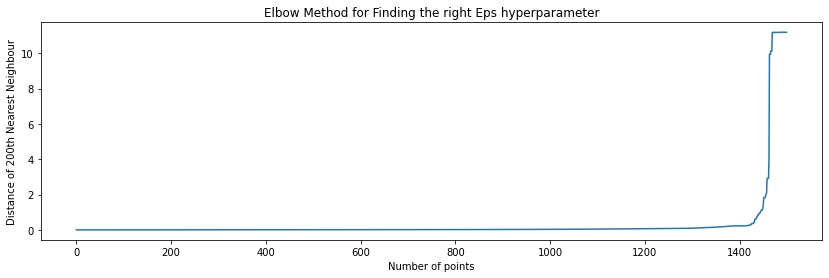

In [23]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [24]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [25]:
dbscandf = df
dbscandf['AVG-W2V Clus Label'] = model.labels_
dbscandf.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3032,3032,3032


# **Hierarichal Clustering**

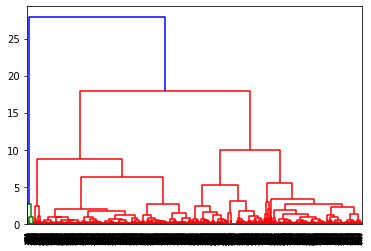

In [26]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors, method='ward'))
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
hcdf = dbscandf
hcdf['AVG-W2V Clus Label'] = cluster.labels_

In [ ]:
hcdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

We can conveniently classify clusters into classes using K Means, and we can also determine the optimum set of data and prepare the KMeans algorithm and used the best clustering results, giving us the optimal approach to generate Responses.
Hierarchical clustering is the second best model, because it would be very hard to identify the clusters with Hierarchical clustering.DBScan grouped all of the feedback into a single cluster, which isn't the most appropriate match.